# Limpieza y Visualización de Datos con Pandas y Matplotlib

Para esto, debemos realizar lo siguiente: 

1. Cargar y explorar un dataset.

2. Aplicar técnicas de limpieza usando pandas.

3. Convertir datos (fechas, números, categorías).

4. Visualizar los datos limpios con matplotlib para obtener insights.

### Requerimientos: 
1. Entorno Virtual.
2. Datasets.
3. Librerias: Pandas, sqlite3, Matplotlib.

**Para realizar esto, debemos instalar las siguientes dependencias** 

In [ ]:
pip install pandas matplotlib

## Extración de datos con Pandas
Vamos a utilizar pandas para leer nuestro csv

In [2]:
# importar librerías
import pandas as pd

**Creamos nuestro DF**

En el caso de que nos de un error de decodificación, podriamos utilizar el encoding "ISO-8859-1"

In [7]:
df = pd.read_csv("datasets.csv", on_bad_lines="skip")
df.head(10)


,Nombre,Edad,Email,Fecha_Registro,Ingresos,Genero,Comentario
0,Juan Prez,29,juanperez@gmail,2021-03-15,"$3,000",M,Cliente frecuente
1,Mara Lpez,NaN,m.lopez@outlook.com,15/04/2021,4000,F,Cliente Frecuente
2,jose lopez,NaN,joselopez@,2021/05/20,3500.00,M,NaN
3,Ana Gmez,31,ana_gomez@gmail.com,2021-06-01,NaN,f,NaN
4,Juan Prez,29,juanperez@gmail,2021-03-15,"$3,000",M,Cliente frecuente
5,NaN,45,NaN,2021-07-12,5000.50,M,NaN
6,Lucas Torres,27,lucastorres@correo,2021-08-01,4800,MASCULINO,Cliente VIP
7,Mara Lpez,30,m.lopez@outlook.com,2021-04-15,4000,F,NaN
8,Laura Fernndez,26,laura@correo.com,2021-09-01,not available,F,Cliente nuevo
9,Jos Lpez,30,joselopez@gmail.com,2021-10-10,3.600,M,NaN


### Explorar el datasets
Ahora debemos utilizar funciones de pandas para poder explorar los tipos de datos que tenemos y obviamente ver si tenemos datos nulos o inservibles. 

In [8]:
df.isnull().sum()

Nombre             1
Edad              14
Email              7
Fecha_Registro     0
Ingresos           8
Genero             4
Comentario        24
dtype: int64

# Limpieza de Datos
3. **Conversión de Tipos y Estandarización** 

* Edad: Convertir a numérico, usando errors="coerce" para transformar valores inválidos en NaN.

* Fecha_Registro: Convertir las fechas a formato datetime.

* Ingresos: Remover símbolos y convertir a numérico.

* Genero: Estandarizar los valores ("MASCULINO" o "m" a "M", "FEMENINO" o "f" a "F").

* Nombres: Corregir la capitalización y quitar espacios extras.

### Convertir Edad a numérico
Edad: Convertir a numérico con to_numeric() usando errors="coerce" para transformar valores inválidos en NaN.

In [10]:
# Convertir Edad a numérico
df["Edad"] = pd.to_numeric(df["Edad"], errors="coerce")
df.head(10)

,Nombre,Edad,Email,Fecha_Registro,Ingresos,Genero,Comentario
0,Juan Prez,29.0,juanperez@gmail,2021-03-15,"$3,000",M,Cliente frecuente
1,Mara Lpez,NaN,m.lopez@outlook.com,15/04/2021,4000,F,Cliente Frecuente
2,jose lopez,NaN,joselopez@,2021/05/20,3500.00,M,NaN
3,Ana Gmez,31.0,ana_gomez@gmail.com,2021-06-01,NaN,f,NaN
4,Juan Prez,29.0,juanperez@gmail,2021-03-15,"$3,000",M,Cliente frecuente
5,NaN,45.0,NaN,2021-07-12,5000.50,M,NaN
6,Lucas Torres,27.0,lucastorres@correo,2021-08-01,4800,MASCULINO,Cliente VIP
7,Mara Lpez,30.0,m.lopez@outlook.com,2021-04-15,4000,F,NaN
8,Laura Fernndez,26.0,laura@correo.com,2021-09-01,not available,F,Cliente nuevo
9,Jos Lpez,30.0,joselopez@gmail.com,2021-10-10,3.600,M,NaN


### Convertir Fecha_Registro a datetime


In [18]:
# Convertir Fecha_Registro a datetime (detecta errores y asigna NaT)
df["Fecha_Registro"]= pd.to_datetime(df["Fecha_Registro"])
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Nombre          47 non-null     object        
 1   Edad            32 non-null     float64       
 2   Email           41 non-null     object        
 3   Fecha_Registro  32 non-null     datetime64[ns]
 4   Ingresos        40 non-null     object        
 5   Genero          44 non-null     object        
 6   Comentario      24 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 2.8+ KB


### Limpiar columna de ingresos
Para ello, esta vez utilizaremos el siguiente REGEX 
* "[\$,]", "", regex=True

In [23]:
df["Ingresos"] = df["Ingresos"].replace("[\$,]", "", regex=True)
df["Ingresos"] = pd.to_numeric(df["Ingresos"], errors="coerce")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Nombre          47 non-null     object        
 1   Edad            32 non-null     float64       
 2   Email           41 non-null     object        
 3   Fecha_Registro  32 non-null     datetime64[ns]
 4   Ingresos        32 non-null     float64       
 5   Genero          44 non-null     object        
 6   Comentario      24 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 2.8+ KB


### Estandarizar Género
Estandarizar los valores ("MASCULINO" o "m" a "M", "FEMENINO" o "f" a "F").

In [29]:
df["Genero"] = df["Genero"].str.upper().str.strip()
df["Genero"] = df["Genero"].replace({"FEMENINO":"F", "MASCULINO":"M"})
df.head()

,Nombre,Edad,Email,Fecha_Registro,Ingresos,Genero,Comentario
0,Juan Prez,29.0,juanperez@gmail,2021-03-15,3000.0,M,Cliente frecuente
1,Mara Lpez,NaN,m.lopez@outlook.com,NaT,4000.0,F,Cliente Frecuente
2,jose lopez,NaN,joselopez@,NaT,3500.0,M,NaN
3,Ana Gmez,31.0,ana_gomez@gmail.com,2021-06-01,NaN,F,NaN
4,Juan Prez,29.0,juanperez@gmail,2021-03-15,3000.0,M,Cliente frecuente


### Normalizar Nombres

 Corregir la capitalización y quitar espacios extras.

In [32]:
df["Nombre"] = df["Nombre"].str.title().str.strip()
df.head(20)

,Nombre,Edad,Email,Fecha_Registro,Ingresos,Genero,Comentario
0,Juan Prez,29.0,juanperez@gmail,2021-03-15,3000.0,M,Cliente frecuente
1,Mara Lpez,NaN,m.lopez@outlook.com,NaT,4000.0,F,Cliente Frecuente
2,Jose Lopez,NaN,joselopez@,NaT,3500.0,M,NaN
3,Ana Gmez,31.0,ana_gomez@gmail.com,2021-06-01,NaN,F,NaN
4,Juan Prez,29.0,juanperez@gmail,2021-03-15,3000.0,M,Cliente frecuente
5,NaN,45.0,NaN,2021-07-12,5000.5,M,NaN
6,Lucas Torres,27.0,lucastorres@correo,2021-08-01,4800.0,M,Cliente VIP
7,Mara Lpez,30.0,m.lopez@outlook.com,2021-04-15,4000.0,F,NaN
8,Laura Fernndez,26.0,laura@correo.com,2021-09-01,NaN,F,Cliente nuevo
9,Jos Lpez,30.0,joselopez@gmail.com,2021-10-10,3.6,M,NaN


### Manejo de Valores Nulos
Ahora debemos buscar los valores nulos actuales.

In [44]:
df.isnull().sum()

Nombre             1
Edad               0
Email              7
Fecha_Registro    16
Ingresos          16
Genero             4
Comentario        24
dtype: int64

**Podriamos aplicar metodos como imputación en columnas claves, tales como en edad o ingresos**

Imputar significa reemplazar datos faltantes (NaN) con un valor estimado para evitar perder información o eliminar filas completas.

In [47]:
df["Edad"]= df["Edad"].astype(int)
df.head(10)

,Nombre,Edad,Email,Fecha_Registro,Ingresos,Genero,Comentario
0,Juan Prez,29,juanperez@gmail,2021-03-15,3000.0,M,Cliente frecuente
1,Mara Lpez,29,m.lopez@outlook.com,NaT,4000.0,F,Cliente Frecuente
2,Jose Lopez,29,joselopez@,NaT,3500.0,M,NaN
3,Ana Gmez,31,ana_gomez@gmail.com,2021-06-01,NaN,F,NaN
4,Juan Prez,29,juanperez@gmail,2021-03-15,3000.0,M,Cliente frecuente
5,NaN,45,NaN,2021-07-12,5000.5,M,NaN
6,Lucas Torres,27,lucastorres@correo,2021-08-01,4800.0,M,Cliente VIP
7,Mara Lpez,30,m.lopez@outlook.com,2021-04-15,4000.0,F,NaN
8,Laura Fernndez,26,laura@correo.com,2021-09-01,NaN,F,Cliente nuevo
9,Jos Lpez,30,joselopez@gmail.com,2021-10-10,3.6,M,NaN


¿Por qué usar la mediana?
La mediana es resistente a valores extremos. Si tenés un dato raro como una edad de 120 años, no va a afectar tanto como afectaría el promedio.

In [49]:

df["Ingresos"].fillna(df["Ingresos"].mean(), inplace=True)
df.head(10)

df.isnull().sum()

C:\Users\hecker\AppData\Local\Temp\ipykernel_4920\3524342715.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Ingresos"].fillna(df["Ingresos"].mean(), inplace=True)


Nombre             1
Edad               0
Email              7
Fecha_Registro    16
Ingresos           0
Genero             4
Comentario        24
dtype: int64

¿Por qué usar la media acá?
En ingresos, muchas veces la distribución no es tan sesgada como en edades (aunque podría serlo), así que la media es una buena primera aproximación

### Matplotlib
Matplotlib es una biblioteca de visualización de datos para el lenguaje de programación Python. Se utiliza principalmente para crear gráficos estáticos, interactivos y animados en dos dimensiones (2D), aunque tiene algunas capacidades básicas en 3D.
Matplotlib está mayormente escrito en Python, pero también incluye componentes en C, C++ y Objective-C (para algunas partes del renderizado y para integrarse con diferentes backends gráficos como Agg, Qt, GTK, etc.).

### Histograma de Edades con matplotlib

Este gráfico permite ver la distribución de la edad de los clientes.

Puntos a resaltar:

Uso de dropna() para evitar problemas con valores faltantes.

Configuración de etiquetas, título y estilo.

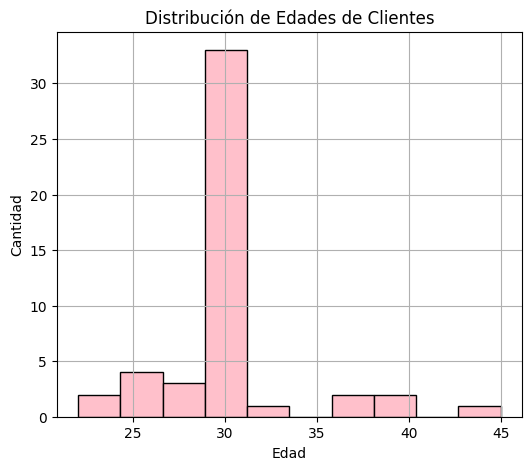

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.hist(df["Edad"], color='pink', edgecolor="black")
plt.title("Distribución de Edades de Clientes")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.grid(True)
plt.show()

### Serie Temporal de Registros
Visualizar la evolución de registros en el tiempo, usando la fecha de registro.

Puntos a resaltar:

Agrupar por fechas y visualizar tendencias temporales.

La importancia de formatear fechas y ajustar la visualización.

Fecha_Registro
2021-03-15    4
2021-04-15    1
2021-05-20    1
2021-06-01    4
2021-07-01    2
2021-07-12    1
2021-08-01    4
2021-09-01    2
2021-10-05    1
2021-10-10    5
2021-11-01    4
2021-12-01    2
2021-12-15    1
dtype: int64


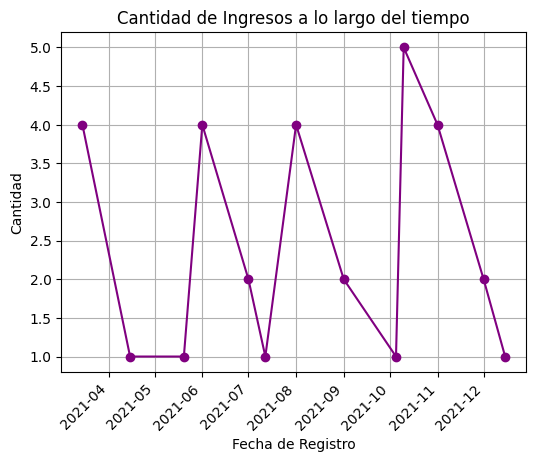

In [56]:

registros_por_fecha = df.groupby("Fecha_Registro").size()
print(registros_por_fecha)

plt.figure(figsize=(6,5))
registros_por_fecha.plot(kind="line", marker="o", linestyle="-", color="purple")
plt.title("Cantidad de Ingresos a lo largo del tiempo")
plt.xlabel("Fecha de Registro")
plt.ylabel("Cantidad")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Otros Gráficos Opcionales
Para enriquecer la clase, puedes proponer ejercicios adicionales como:

Gráfico de dispersión: Relacionar Edad vs. Ingresos para ver posibles tendencias.

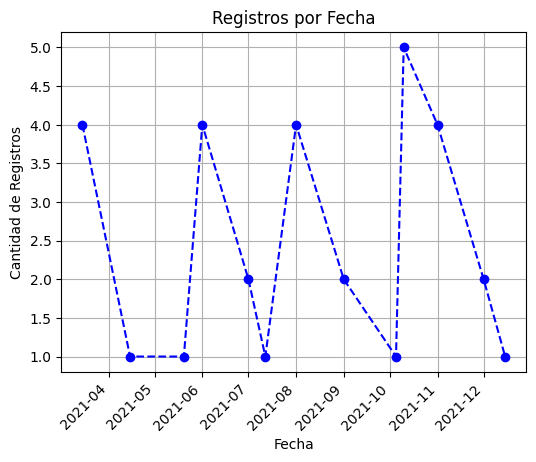

In [58]:
registros_por_fecha=df.groupby("Fecha_Registro").size()

plt.figure(figsize=(6,5))
registros_por_fecha.plot(kind="line", marker="o", linestyle="--", color="blue")
plt.title("Registros por Fecha")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Registros")
plt.xticks(rotation=45)
plt.grid(True)
plt.show() 

Gráfico de pastel: Proporción de clientes por género.

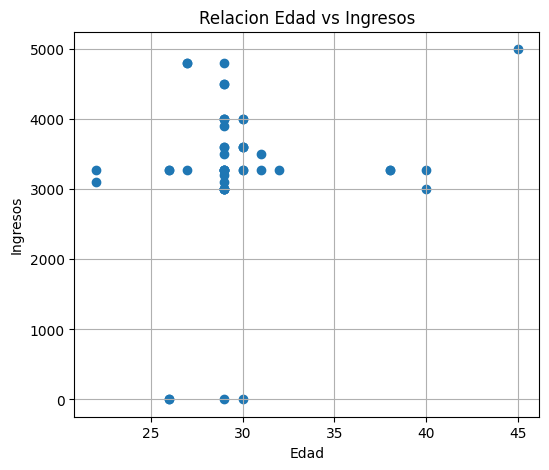

In [59]:
plt.figure(figsize=(6,5))
plt.scatter(df["Edad"], df["Ingresos"])
plt.title("Relacion Edad vs Ingresos")
plt.xlabel("Edad")
plt.ylabel("Ingresos")
plt.grid(True)
plt.show()

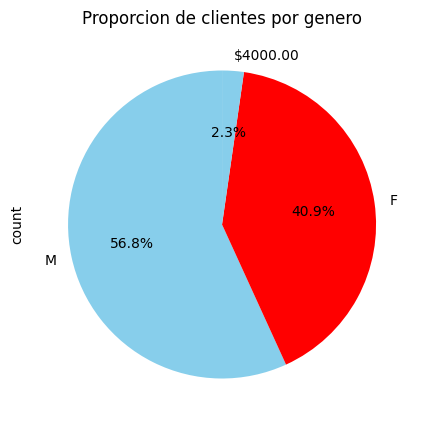

In [60]:
plt.figure(figsize=(6,5))
df["Genero"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["skyblue", "red"])
plt.title("Proporcion de clientes por genero")
plt.show()